In [1]:
import cv2
import numpy as np
from PIL import Image # Biblioteca para manipular imagens 
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
path = './plots_50_epocas_3_camadas/'

In [4]:
with open(f'{path}/model.json', 'r') as json_file:
    json_savedModel= json_file.read()
json_savedModel 

network1_loaded = tf.keras.models.model_from_json(json_savedModel)
network1_loaded.load_weights(f'{path}weights1.hdf5')
network1_loaded.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
network1_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8193)              134242305 
                                                                 
 dense_1 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_2 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


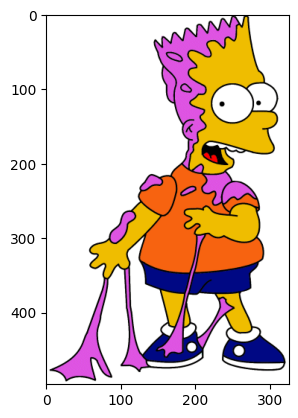

In [6]:
# Carregando a imagem
imagem_teste = cv2.imread('./data/homer_bart_1/bart1.bmp')
imagem_pil = Image.fromarray(cv2.cvtColor(imagem_teste, cv2.COLOR_BGR2RGB))
plt.imshow(imagem_pil)

In [7]:
# Redimensionando a imagem
largura, altura = 128, 128
imagem_teste = cv2.resize(imagem_teste, (largura, altura))


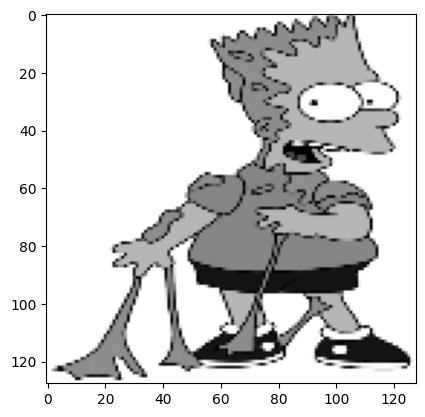

In [8]:
# converte imagem em escala de cinza
imagem_teste = cv2.cvtColor(imagem_teste, cv2.COLOR_BGR2GRAY)
imagem_pil = Image.fromarray(cv2.cvtColor(imagem_teste, cv2.COLOR_BGR2RGB))
plt.imshow(imagem_pil)

In [9]:
# Convertendo a imagem em vetor e normalizando
imagem_teste = imagem_teste.ravel()
imagem_teste = np.array(imagem_teste).reshape(1, -1)
imagem_teste.shape

(1, 16384)

In [10]:
network1_loaded.predict(imagem_teste)[0]

1/1 [==============================] - 0s 116ms/step


array([1.], dtype=float32)

In [11]:
# Verificando resultado
if network1_loaded.predict(imagem_teste)[0][0] > 0.5:
    print('A imagem é do Bart')
    
else:
    print('A imagem é do Homer')    


1/1 [==============================] - 0s 50ms/step
A imagem é do Bart
